# Análise de Gastos com Cartão de Crédito no Brasil

Neste projeto vamos analisar o perfil de gastos no crédito dos clientes de um banco mediano brasileiro. Nos dados que temos disponíveis, possuímos o ID de cada usuário, junto ao seu sexo e idade, assim como o número da agência, a cidade e o estado em que foi registrada a transação. Temos também o valor, a data, o tipo de despesa, a cidade e o país onde a compra foi realizada.

Procuramos entender como é o perfil de gastos dos clientes, o valor gasto por dia, a diferença entre os consumidores de cada cidade e os tipos de compras mais comuns.

Os dados foram obtidos através [deste dataset](https://www.kaggle.com/datasets/sufyant/brazilian-real-bank-dataset) do Kaggle.

## Pré-processamento dos dados

Vamos começar importando algumas bibliotecas que nos ajudarão na no projeto.

In [1]:
# Biblioteca para criação e manipulação de bancos de dados
import pandas as pd

# Biblioteca para criação de gráficos e diagramas
import matplotlib.pyplot as plt

Agora podemos carregar nossos dados.

In [2]:
# Carregando os dados na tabela 'df'
df = pd.read_csv('C:/Users/atlas/documents/projetos_dados/datasets/br-credit-card.csv',
                 encoding='CP1252', 
                 sep=';', 
                 decimal=',', 
                 na_values=' -   ',
                 thousands='.',
                 parse_dates=[8], 
                 dayfirst=True)

# Imprimindo as 5 primeiras linhas
df.head()

,id,safra_abertura,cidade,estado,idade,sexo,limite_total,limite_disp,data,valor,grupo_estabelecimento,cidade_estabelecimento,pais_estabelecimento
0,4.530000e+11,201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,5605,2019-12-04,31.00,SERVI‚O,SAO PAULO,BR
1,4.530000e+11,201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,5343,2019-11-09,150.01,FARMACIAS,SANTOS,BR
2,4.530000e+11,201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,2829,2019-05-06,50.00,SERVI‚O,SAO PAULO,BR
3,4.530000e+11,201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,2547,2019-06-01,54.40,M.O.T.O.,OSASCO,BR
4,4.530000e+11,201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,2515,2019-06-01,32.79,M.O.T.O.,OSASCO,BR


Vamos solicitar algumas informações sobre os dados:

In [3]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4955 entries, 0 to 4954
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      4955 non-null   float64       
 1   safra_abertura          4955 non-null   int64         
 2   cidade                  4955 non-null   object        
 3   estado                  4955 non-null   object        
 4   idade                   4955 non-null   int64         
 5   sexo                    4955 non-null   object        
 6   limite_total            4955 non-null   int64         
 7   limite_disp             4955 non-null   int64         
 8   data                    4955 non-null   datetime64[ns]
 9    valor                  4942 non-null   float64       
 10  grupo_estabelecimento   4955 non-null   object        
 11  cidade_estabelecimento  4936 non-null   object        
 12  pais_estabelecimento    4937 non-null   object  

Todas as colunas estão com valores corretos. Porém, podemos notar que a coluna ``valor`` parece conter espaços no início, além de valores ausentes nessa e nas colunas ``grupo_estabelecimento``, ``cidade_estabelecimento`` e ``país estabelecimento``. Vamos imprimir uma lista com os nomes das colunas para verificar se existem mesmo espaços desnecessários nos nomes das colunas.

In [4]:
df.columns

Index(['id', 'safra_abertura', 'cidade', 'estado', 'idade', 'sexo',
       'limite_total', 'limite_disp', 'data', ' valor ',
       'grupo_estabelecimento', 'cidade_estabelecimento',
       'pais_estabelecimento'],
      dtype='object')

A única coluna com espaços ao redor do nome é realmente a coluna ``valor``. Vamos renomeá-la.

In [5]:
df.rename(columns={' valor ': 'valor'}, inplace=True)

Agora vamos conferir os valores ausentes. As ausências mais importantes são na coluna ``valor``, uma vez que é uma informação essencial para nossas análises. Vamos ver se há um padrão nas ausências.

In [6]:
df[df['valor'].isnull()]

,id,safra_abertura,cidade,estado,idade,sexo,limite_total,limite_disp,data,valor,grupo_estabelecimento,cidade_estabelecimento,pais_estabelecimento
712,9.487371e+10,201710,SAO PAULO,SP,32,F,2200,628,2019-05-12,NaN,TRANS FINANC,NaN,NaN
775,9.487371e+10,201710,SAO PAULO,SP,32,F,2200,9,2019-09-10,NaN,TRANS FINANC,NaN,NaN
1071,5.020000e+11,201901,SAO PAULO,SP,34,F,5750,1012,2019-12-27,NaN,TRANS FINANC,NaN,NaN
1380,5.020000e+11,201901,SAO PAULO,SP,34,F,3400,110,2019-08-13,NaN,TRANS FINANC,NaN,NaN
1427,5.020000e+11,201901,SAO PAULO,SP,34,F,4000,934,2019-10-19,NaN,TRANS FINANC,NaN,NaN
1432,5.020000e+11,201901,SAO PAULO,SP,34,F,4000,333,2019-10-22,NaN,TRANS FINANC,NaN,NaN
1890,3.310000e+11,201903,SAO PAULO,SP,33,M,12000,9090,2020-02-17,NaN,RESTAURANTE,NaN,NaN
2449,6.060000e+11,201711,LOUVEIRA,SP,43,M,40000,24390,2020-02-17,NaN,SERVI‚O,NaN,NaN
3429,5.020000e+11,201901,SAO PAULO,SP,34,F,5200,36,2019-08-27,NaN,TRANS FINANC,NaN,NaN
3452,5.020000e+11,201901,SAO PAULO,SP,34,F,5200,2004,2019-11-10,NaN,TRANS FINANC,NaN,NaN


Não parece haver uma justificativa para essas ausências. Para evitar problemas na nossa análise, é melhor excluir essas linhas. São poucas, então não impactará de forma significativa nossos dados.

In [7]:
# Excluindo as linhas com valor ausente
df.dropna(axis=0, subset=['valor'], inplace=True)

# Conferindo se ainda existem valores nulos
df[df['valor'].isnull()]

,id,safra_abertura,cidade,estado,idade,sexo,limite_total,limite_disp,data,valor,grupo_estabelecimento,cidade_estabelecimento,pais_estabelecimento


Não restaram valores ausentes na coluna ``valor``. Optamos por deixar as linhas das outras colunas com valores ausentes, uma vez que seus dados ainda serão úteis para outras análises. Agora vamos conferir se há valores duplicados.

In [8]:
df[df.duplicated()]

,id,safra_abertura,cidade,estado,idade,sexo,limite_total,limite_disp,data,valor,grupo_estabelecimento,cidade_estabelecimento,pais_estabelecimento
65,4.530000e+11,201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,2636,2020-05-05,44.90,ARTIGOS ELETRO,OSASCO,BR
1891,3.310000e+11,201903,SAO PAULO,SP,33,M,12000,9079,2020-02-17,10.68,RESTAURANTE,RIO DE JANEIR,BR
2717,3.310000e+11,201609,SAO PAULO,SP,31,M,7500,2238,2020-05-04,29.17,SUPERMERCADOS,SAO PAULO,BR
2718,3.310000e+11,201609,SAO PAULO,SP,31,M,7500,2184,2020-05-05,53.79,VAREJO,OSASCO,BR
4072,6.510000e+11,201705,SAO PAULO,SP,27,M,3650,3783,2019-07-18,6.53,SERVI‚O,SAO PAULO,BR
4091,6.510000e+11,201705,SAO PAULO,SP,27,M,3650,2665,2019-08-01,5.55,SERVI‚O,SAO PAULO,BR
4563,1.000000e+12,201905,SAO PAULO,SP,39,M,18000,2118,2020-05-04,74.95,SERVI‚O,SAO PAULO,BR
4564,1.000000e+12,201905,SAO PAULO,SP,39,M,18000,1119,2020-05-05,999.66,SERVI‚O,VITORIA,BR
4684,1.790000e+11,201408,SAO PAULO,SP,42,F,7500,4809,2020-05-05,3.50,VAREJO,SAO PAULO,BR


Existem algumas linhas duplicadas, vamos excluí-las e ver como ficaram as informações da nossa tabela.

In [9]:
df.drop_duplicates(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4933 entries, 0 to 4954
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      4933 non-null   float64       
 1   safra_abertura          4933 non-null   int64         
 2   cidade                  4933 non-null   object        
 3   estado                  4933 non-null   object        
 4   idade                   4933 non-null   int64         
 5   sexo                    4933 non-null   object        
 6   limite_total            4933 non-null   int64         
 7   limite_disp             4933 non-null   int64         
 8   data                    4933 non-null   datetime64[ns]
 9   valor                   4933 non-null   float64       
 10  grupo_estabelecimento   4933 non-null   object        
 11  cidade_estabelecimento  4926 non-null   object        
 12  pais_estabelecimento    4927 non-null   object  

Tudo parece correto. Vamos iniciar a análise exploratória dos dados (EDA).

## Análise Exploratória de Dados (EDA)

Primeiro, vamos ver alguns dados da distribuição do valor das compras.

In [10]:
df['valor'].describe()

count     4933.000000
mean       117.726617
std        529.500188
min          0.030000
25%         13.850000
50%         32.700000
75%         86.020000
max      14618.360000
Name: valor, dtype: float64

75% das compras custa menos que 86,02. O valor médio é 117,73 e mediana 32,70, o que indica que há uma assimetria positiva na distribuição, ou seja, que existem valores incomuns muito acima da mediana influenciando a média. Isso é visível pelo valor máximo de 14618,36. Vamos ver alguns cálculos da distribuição de gastos por pessoa.

In [11]:
df.groupby('id').agg({'valor':'sum'}).describe()

,valor
count,28.000000
mean,20740.907143
std,27898.418124
min,1686.980000
25%,7910.422500
50%,13263.565000
75%,20219.735000
max,151744.490000


O gasto médio dos 28 clientes do conjunto de dados no período é de 20740,91, já a mediana é de 13263,56. Tal como no valor das compras, parecem haver alguns clientes que gastam bem acima da média, o que causa uma assimetria positiva na distribuição. 75% dos clientes gastaram menos que 20219,73. Vamos criar um histograma para observar melhor como esses dados se distribuem.

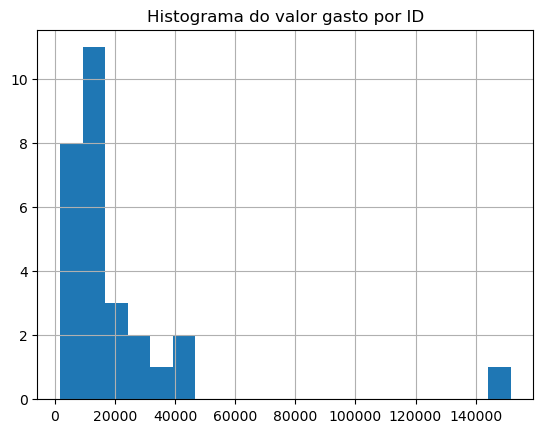

In [12]:
df.groupby('id').agg({'valor':'sum'}).hist(bins=20)
plt.title('Histograma do valor gasto por ID')
plt.show()

A grande maioria dos clientes gastou entre 0 e 20000, mas há um grupo que gastou mais que 140000, que deve estar influenciando a média da distribuição.

Vamos ver como é o gasto de acordo com a cidade dos clientes. Primeiro, vejamos algumas informações da disitruição.

In [13]:
cidades = df.groupby('cidade', as_index=False).agg({'valor':'sum'}).sort_values(by='valor', ascending=False)
cidades.describe()

,valor
count,10.000000
mean,58074.540000
std,98309.169002
min,5191.300000
25%,10953.745000
50%,13766.585000
75%,33148.377500
max,308450.770000


A média de gastos entre as 10 cidades dos clientes do banco é de 58074,54. Já a mediana é de 13766,58, bem menor que a média, como no caso dos gastos individuais. Isso indica que algumas cidades tem gastos muito maiores que as outras. Vamos construir um gráfico de barras para comparar.

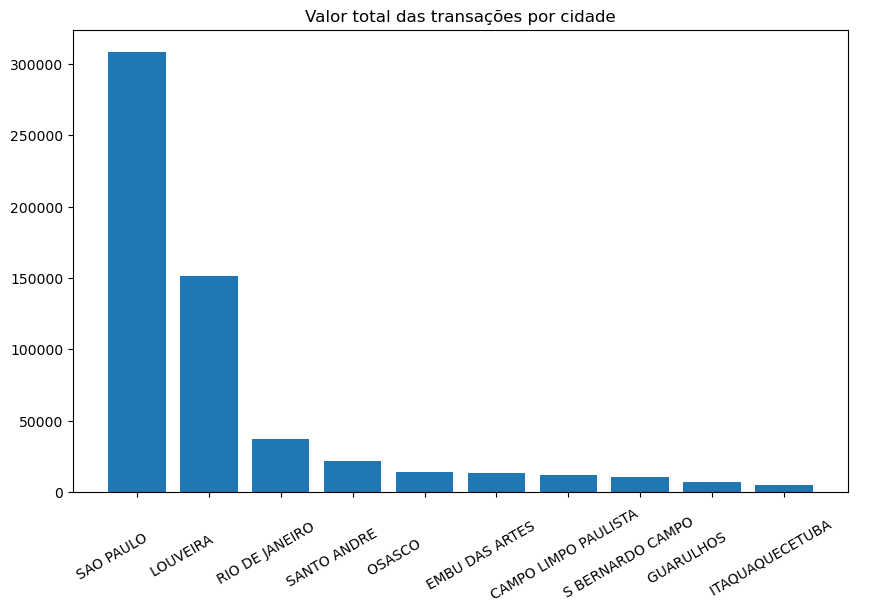

In [14]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=30)
plt.bar(cidades['cidade'], cidades['valor'])
plt.title('Valor total das transações por cidade')
plt.show()

São Paulo e Louveira se destacam, sendo as cidades de onde os clientes gastaram mais. A discrepância é bem significativa quando comparamos com Rio de Janeiro e Santo André, as cidades em terceiro e quarto lugares. Provavelmente há mais clientes nessas cidades. Vamos calcular o gasto médio por cliente em cada cidade.

In [15]:
df.groupby('cidade').agg({'valor':'mean'}).sort_values(by='valor', ascending=False)

,valor
cidade,
LOUVEIRA,609.415622
S BERNARDO CAMPO,204.668269
EMBU DAS ARTES,201.820758
GUARULHOS,173.064103
RIO DE JANEIRO,138.147052
CAMPO LIMPO PAULISTA,95.860726
SAO PAULO,86.063273
SANTO ANDRE,83.748171
OSASCO,68.004785


Quando tratamos do gasto médio, Louveira tem um grande destaque. É possível afirmar que os clientes dessa cidade são realmente os que mais compram no cartão de crédito do nosso conjunto de dados. Já São Paulo, que registrava o maior volume de gastos, ficou apenas na posição 7, o que demonstra que o volume se dá devido a quantidade de clientes.

Vamos ver algumas informações sobre os gastos diários.

In [16]:
df_dt = df.groupby('data', as_index=False).agg({'valor':'sum'})

df_dt.describe()

,valor
count,403.000000
mean,1441.055583
std,3164.205450
min,5.900000
25%,483.245000
50%,864.120000
75%,1495.030000
max,54506.290000


Nos 403 dias cobertos pelos nossos dados, tivemos uma média diária de gastos de 1441,05. O gasto mediana foi mais modesto, de 864,12. Houve uma variação de 5,9, no dia com menos gastos, até 54506,29, o dia com mais. Vamos criar um gráfico de linhas com esses dados.

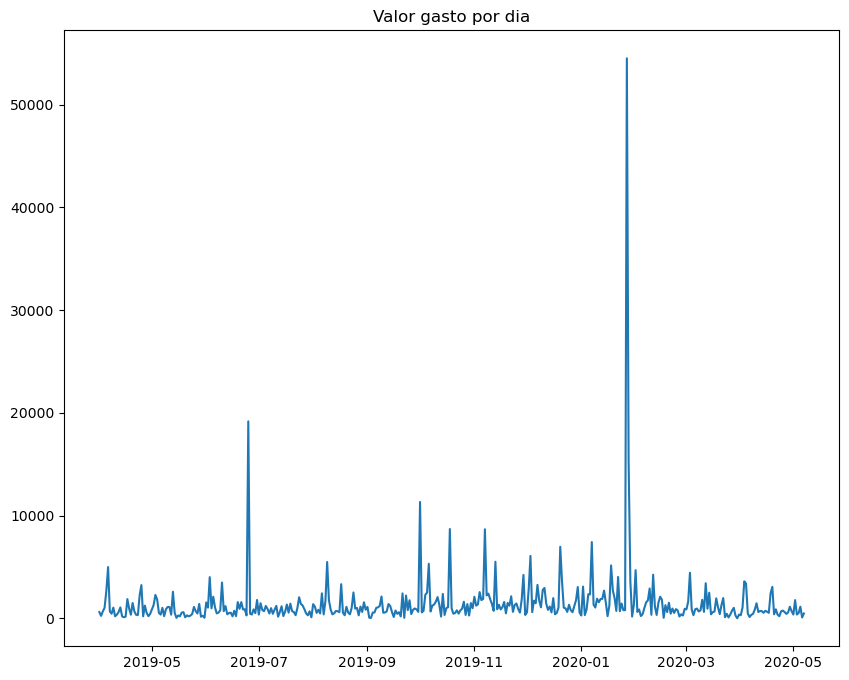

In [17]:
plt.figure(figsize=(10,8))
plt.plot(df_dt['data'], df_dt['valor'])
plt.title('Valor gasto por dia')
plt.show()

Os gastos oscilam mais ou menos ao redor do mesmo nível, com excessão de alguns picos, um bem demarcado em especial. Vamos tentar descobrir a data para saber se pode ser relacionado a algum feriado ou acontecimento especial.

In [18]:
df_dt[df_dt['valor']==df_dt['valor'].max()]

,data,valor
301,2020-01-27,54506.29


Apesar de incomum, não parece ter nada especial nesse dia. Talvez alguma promoção específica ou movimento espontâneo. Vamos ver como os gastos variam, em média, de acordo com o sexo dos clientes.

In [19]:
df.groupby('sexo').agg({'valor':'mean'})

,valor
sexo,
F,88.488283
M,150.258176


Entre os clientes do nosso conjunto de dados, os homens gastam, em média, quase o dobro que as mulheres. Por último, vamos conferir quais os tipos de gastos mais comuns.

In [22]:
gp_df = df.groupby('grupo_estabelecimento', as_index=False).agg({'valor':'sum'}).sort_values(by='valor', ascending=False).head(10)

gp_df

,grupo_estabelecimento,valor
17,SERVI‚O,91037.48
19,VAREJO,77422.46
15,RESTAURANTE,62595.42
4,CIA AEREAS,58953.98
20,VESTUARIO,50344.57
18,SUPERMERCADOS,42208.05
11,M.O.T.O.,36996.78
8,INEXISTENTE,24213.83
2,ARTIGOS ELETRO,20826.69
5,FARMACIAS,17389.84


Temos que Serviços são o tipo de uso mais comum feito pelos clientes no cartão. Depois temos Varejo e Restaurante, seguidos por Companhias Aéreas. Há uma certa quantidade de gastos não definidos, na categoria Inexistente. Em último lugar, temos as farmácias. Isso provavelmente reflete a quantidade de itens de Serviço, Varejo e Restaurante que é contratada pelos clientes regularmente. Já gastos menos corriqueiros, como Artigos Eletrônicos, ficaram nas últimas posições. Vamos observar esses dados em um gráfico de barras.

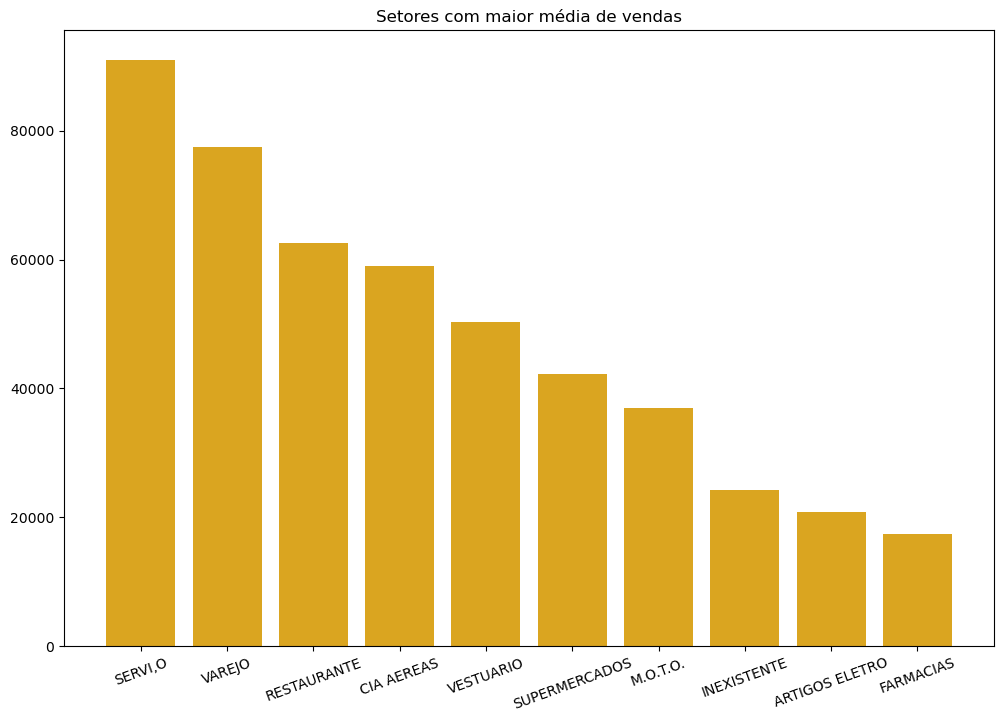

In [28]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=20)
plt.bar(gp_df['grupo_estabelecimento'], gp_df['valor'], color='goldenrod')
plt.title('Setores com maior média de vendas')
plt.show()

Podemos observar como os gastos com Serviço são os mais comuns entre os clientes, e como Varejo vem logo em seguida. Visualmente, vemos como os gastos com Eletrônicos e Farmácias ficam atrás da maioria.

## Conclusões

Através das nossas análises, pudemos observar que 75% dos usuários gastaram menos de 20219,73 no período, ao passo que a mediana foi de 13263,56. Porém, há uma assimetria positiva na distribuição, o que pudemos constatar pela média bem maior que a mediana e pelo formato do histograma criado.

Vimos como a cidade de São Paulo se destaca no volume total de transações, o que reflete a maior quantidade de clientes na cidade. Já o gasto médio por cliente é maior na cidade de Louveira, seguido por São Bernardo do Campo. Isso demonstra como os perfis dos clientes das cidades varia, sendo São Paulo, uma cidade com mais habitantes, é comum ter mais clientes e um volume total maior de transações. Já as cidades com maior gasto médio por cliente se destacam por serem lar de clientes com hábitos de consumo no crédito mais frequente ou em maior valor. Talvez focar em trazer novos clientes dessas cidades seja uma ação mais interessante do que focar em expandir a clientela paulistana, que já é grande.

Há uma certa estabilidade nos gastos diários, com apenas alguns picos que com os dados disponibilizados não foi possível justificar.

Já os tipos de gastos com maior volume são Serviços, Varejo e Restaurantes. Provavelmente devido a frequência maior de gastos com essas categorias, é mais comum que sejam feitos no cartão de crédito do que outras despesas como Eletrônicos. Estes, sendo bens de maior valor, também costumam oferecer maiores descontos quando comprados à vista.